<a href="https://colab.research.google.com/github/ClaudiuPapasteri/Google-colab/blob/main/Google_colab_Rnotebook_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title**

## ***Subtitele***

Claudiu Papasteri

<i>Native R Google Colab Template</i>

- Info: Template for self-contained data science projects
- Equivalent R Notebook: https://claudiupapasteri.github.io/notebooks/r-notebook-template/r-notebook-template.nb.html

[My Github notebooks](https://github.com/ClaudiuPapasteri/notebooks)

## Global Parameters


```
# Set Global Parameters here
```

In [1]:
options(rlang_interactive = TRUE)  # needed to mount Google Drive

In [2]:
cat("R version: ")
R.Version()$version.string

cat("Number of cores: ")
library(parallel)
parallel::detectCores(all.tests = FALSE, logical = TRUE)

R version: 

[1] "R version 4.0.3 (2020-10-10)"

Number of cores: 

[1] 2

---

## Install & load packages

In [3]:
load.libs <- 
  c(
    "tidyverse", "ggplot2", "DT", 
    "googledrive", "googlesheets4"
   )
install.libs <- load.libs[!load.libs %in% installed.packages()]
for(libs in install.libs) install.packages(libs, dependences = TRUE)
sapply(load.libs, require, character = TRUE)
rm(list = ls())

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gargle’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ids’


Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: DT

Loading required package: googledrive

Loading required package: googlesheets4


Attaching package: ‘googlesheets4’


The following objects are masked from ‘package:googledrive’:

    request_generate, request_make




tidyverse       ggplot2            DT   googledrive googlesheets4 
         TRUE          TRUE          TRUE          TRUE          TRUE

---

# Define functions


In [ ]:
###############################################################################
# Define function 
###############################################################################




---

# Mount Google Drive

In [4]:
# Mount Google Drive in an R kernel
library("googledrive")
library("googlesheets4")

# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")) {
  suppressMessages({
    install.packages("R.utils")
    library(R.utils)
    library(httr)
    library(rlang)
  })  
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  reassignInPackage("is_interactive", pkgName = "rlang", my_check) 
}

# Call Google Drive authentication forcing interactive login and save in cache 
googledrive::drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-0l3n5tr582q443rnomebdeeo0156b2bc.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AY0e-g5K47D5QG87JDwZSn41qEDlvLIxpdFyWDahH40Q9lRRxM5w6XyBVZ8


# Load data from Google Sheet in Google Drive

In [ ]:
# Find Google Sheets 
Sheets <- googledrive::drive_find(type = "spreadsheet")

# Reuse token to Sheet authentification 
googlesheets4::gs4_auth(token = drive_token())

# Read first Google Sheet in Google Drive
sheet_data <- googlesheets4::range_read(Sheets$id[1])

Reading from "FPSE profil Google scholar"

Range "Foaie1"



# Load data, processing, scoring

In [ ]:
###############################################################################
# Load data
###############################################################################

# Load from package
rawdata <- ggplot2::diamonds

###############################################################################
# Processing data
###############################################################################
processed_data <- 
  rawdata %>% 
  dplyr::filter(carat <= 2.5)

# Run code from Github gist

In [ ]:
devtools::source_gist("https://gist.github.com/C-C-P/32869ae032ead6ebb2167554108dad12")    # use also devtools::source_url()

Sourcing https://gist.githubusercontent.com/C-C-P/32869ae032ead6ebb2167554108dad12/raw/6b549be63dbffa66dca982af75c02a6b32184d1c/gist_test_google_colab.R

SHA-1 hash of file is 4b315ce7e2f6bd3311f67d5b46d6330cc85fd84b



[1] 42
Correct, the number is 42

## Output table - _knitr_



In [ ]:
# tibble output
processed_data[1:3, ]

# ??? knitr kable
processed_data[1:3, ] %>%
  knitr::kable(caption = "A knitr kable.", 
               format = "simple"
              )

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31




Table: A knitr kable.

 carat  cut       color   clarity    depth   table   price      x      y      z
------  --------  ------  --------  ------  ------  ------  -----  -----  -----
  0.23  Ideal     E       SI2         61.5      55     326   3.95   3.98   2.43
  0.21  Premium   E       SI1         59.8      61     326   3.89   3.84   2.31
  0.23  Good      E       VS1         56.9      65     327   4.05   4.07   2.31

## Output plot

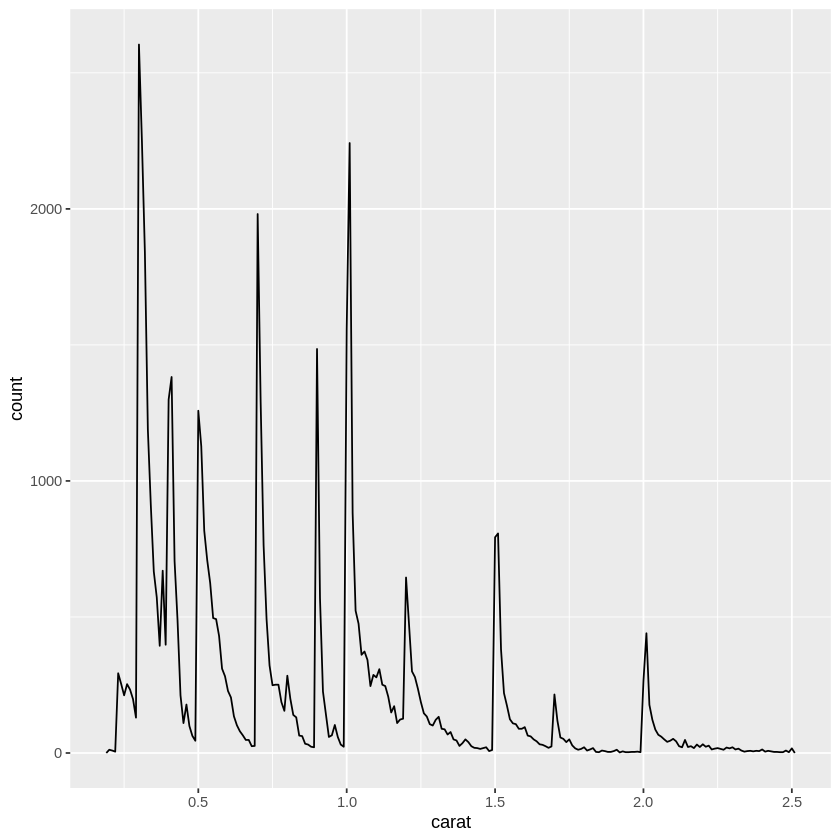

In [ ]:
# Plot
processed_data %>%
  ggplot(aes(carat)) + 
    geom_freqpoly(binwidth = 0.01)

# Save data to Google Sheet

In [28]:
 # Reuse token to sheet authentification 
googlesheets4::gs4_auth(token = drive_token())

# Name Sheet that will be created
gsheet_name <- paste ("Rnotebook Google colab Sheet", Sys.time(), sep = " ")

# Create Sheet in Google Drive
if(googlesheets4::gs4_has_token()) {
  gsheet_obj <- googlesheets4::gs4_create(
    name = gsheet_name,
    sheets = list(Sheet1 = head(iris))    # Data goes in here
    )
}
 
# Check Sheet info
gsheet_obj

# Open a Sheet in default web browser
# googlesheets4::gs4_browse(gsheet_obj)   # works only in interactive, not in Google colab
# Print a Sheet URL
googlesheets4::gs4_get(googlesheets4::gs4_find(gsheet_name))$spreadsheet_url %>%
  httr::BROWSE() 

Creating new Sheet: "Rnotebook Google colab Sheet 2020-11-26 14:40:50"



  Spreadsheet name: Rnotebook Google colab Sheet 2020-11-26 14:40:50
                ID: 1dHjtZFsbbgNH7h99zmVqjZh4JJlt3FpgdbtTlwfxIHI
            Locale: ro_RO
         Time zone: Etc/GMT
       # of sheets: 1

(Sheet name): (Nominal extent in rows x columns)
      Sheet1: 7 x 5

Please point your browser to the following url: 

https://docs.google.com/spreadsheets/d/1dHjtZFsbbgNH7h99zmVqjZh4JJlt3FpgdbtTlwfxIHI/edit?ouid=107664192331087843655&urlBuilderDomain=fpse.unibuc.ro



## Delete Sheet from Google Drive

In [29]:
# Delete Sheet form Google Drive
googledrive::drive_trash(gsheet_obj)          # good for removing in same session (obj still in memory)
# googlesheets4::gs4_find(gsheet_name) %>%   # good for removing in different session
#   googledrive::drive_trash()

Files trashed:
  * Rnotebook Google colab Sheet 2020-11-26 14:40:50: 1dHjtZFsbbgNH7h99zmVqjZh4JJlt3FpgdbtTlwfxIHI



## Sesion Info


```
# Info formatted as code
```

In [ ]:
Sys.info()

sysname                               release 
                              "Linux"                           "4.19.112+" 
                              version                              nodename 
"#1 SMP Thu Jul 23 08:00:38 PDT 2020"                        "b61cfeb3d473" 
                              machine                                 login 
                             "x86_64"                             "unknown" 
                                 user                        effective_user 
                               "root"                                "root"